# Double Digest Problem

In diesem Beispiel betrachten wir das Double Digest Problem. 
Hierfür werden Restriktionsenzyme verwendet um die DNA in Fragmente unterschiedlicher Länge zu zerschneiden.  
Mit Hilfe der Fragmente kann man dann eine physikalische Karte erstellen, welche die Reihenfolge der Fragmente darstellt. Für das Double Digest Problem werden zwei Restriktionsenzyme benötigt, Restriktionsenzym A und Restriktionsenzym B.  

Das Double Digest Verfahren funktioniert wie folgt:  

1. Erzeuge drei Kopien der DNA
2. Wende die Restriktionsenzyme auf die DNA Kopien an:  
    1. Wende Restriktionsenzym A auf die erste DNA Kopie an
    2. Wende Restriktionsenzym B auf die zweite DNA Kopie an
    3. Wende beide Restriktionsenzyme A + B auf die dritte Kopie an
3. Bestimme für jede der Kopien die Längen der Fragmente und speichere diese in drei Listen, $set_a$, $set_b$ und $set_{ab}$
4. Erstelle alle Permutationen für die Listen $set_a$ und $set_b$
5. Berechne für alle möglichen Kombinationen der Permutationen in $set_a$ und $set_b$
    1. die Positionen der Restriktionsstellen in $set_a$ und speichere diese in $pos_a$
    2. die Positionen der Restriktionsstellen in $set_b$ und speichere diese in $pos_b$
    3. die Vereinigung der Positionen von $pos_a$ und $pos_b$
    4. die Distanzen zwischen allen Positionen in der Vereinigungsmenge
    5. Vergleiche die Distanzen mit den Fragmentlängen aus $set_{ab}$. Falls die Mengen gleich sind ist eine gültige Lösung gefunden, welche wir in unserer Lösungsmenge speichern
    
Der Algorithmus findet alle möglichen Lösungen.

### Code Double Digest Problem

In [1]:
%matplotlib inline  
import scipy as sp
import itertools
import pylab as pl
import matplotlib.patches as patches

'''
Finde alle möglichen Lösung mittels Double Digest
'''
def double_digest(set_a, set_b, set_ab):
    set_ab = sp.sort(set_ab)
    #erstelle alle möglichen Permutationen von set_a und set_b
    permsA = itertools.permutations(set_a)
    permsB = itertools.permutations(set_b)
    
    results = []
    for permA, permB in itertools.product(permsA,permsB):
        #berechne Positionen für Permutation A
        posA = sp.cumsum(permA)
        #berechne Positionen für Permutation B
        posB = sp.cumsum(permB)
        #Bilde Schnittmenge zwischen posA und posB
        pos = sp.union1d(posA,posB)
        #Berechne inverse CumSum bzw. Distanzen zwischen allen Positionen in "pos"
        dists = pos.copy()
        dists[1:] = sp.diff(pos)

        if dists.shape[0]!=set_ab.shape[0]:
            continue
        #Falls die Permutierte Distanzliste gleich der Menge der doppelt verdauten Liste enspricht
        #ist eine gültige Lösung gefunden
        if sp.all(sp.equal(sp.sort(dists),set_ab)):
            #if not {"permA":permA,"permB":permB,"positions":pos} in results:
            results.append({"posA":posA,"posB":posB,"positions":pos})
    return results

'''
Plotte Marker
'''
def plot_markers(positions=None,level=1,label=None,color="b",fig_obj=None):
    pl.axhline(level,color=color,label=label)
    for pos in positions:
        fig_obj.add_patch(patches.Rectangle((pos, level-0.25),2,0.5,color="k"))

'''
Plotte Double Digest Lösung
'''
def plot_solutions(results=None):
    for i,res in enumerate(results):
        pl.figure(figsize=(15,5))
        fig = pl.subplot(1,1,1)
        
        plot_markers(positions=res['positions'],level=1,
                     label="Enzym A+B",color="b",
                     fig_obj=fig)
        
        plot_markers(positions=res['posB'],level=2,
                     label="Enzym B",color="r",
                     fig_obj=fig)
        
        plot_markers(positions=res['posA'],level=3,
                     label="Enzym A",color="y",
                     fig_obj=fig)
        
        pl.ylim(0,4)
        pl.xlim(0,res['positions'].max())
        pl.xlabel("Position (kb)", fontsize=14)
        pl.yticks([1,2,3],["Enzym A+B","Enzym B","Enzym A"],fontsize=14)
        pl.title("Loesung %d"%(i+1),fontsize=14)
        pl.tight_layout()

## Beispiel

Positionen Enzym A:	[ 20 220 620 720]
Positionen Enzym B:	[ 50 300 450 670]
Loesung 1:		[ 20  50 220 300 450 620 670 720]

Positionen Enzym A:	[100 500 700 720]
Positionen Enzym B:	[ 50 270 420 670]
Loesung 2:		[ 50 100 270 420 500 670 700 720]



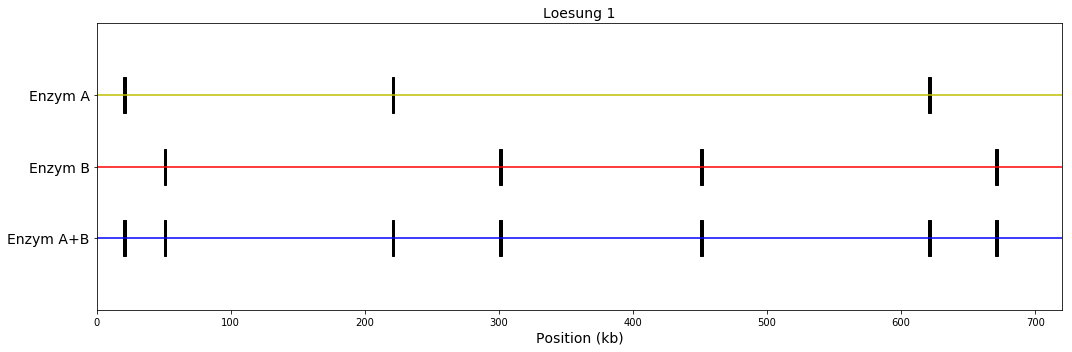

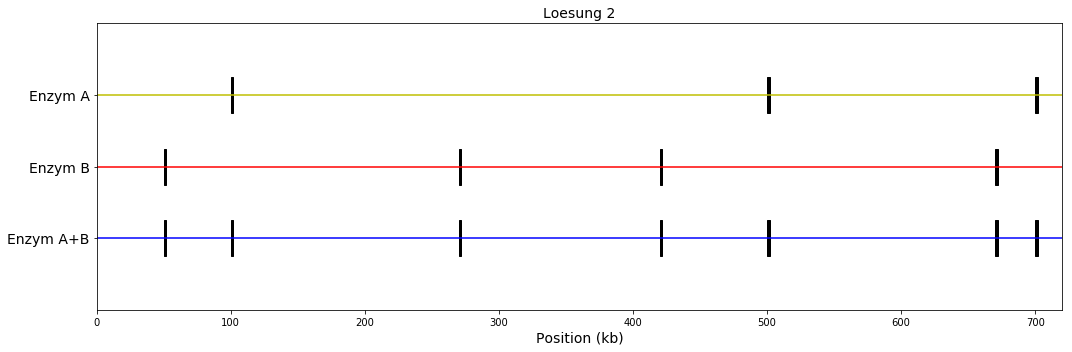

In [2]:
set_a = sp.array([20,100,200,400])
set_b = sp.array([50,150,220,250])
set_ab = sp.array([20,30,50,50,80,150,170,170])

#Berechne Lösungen
results = double_digest(set_a,set_b,set_ab)
#Plotte Lösungen
plot_solutions(results)

for i,result in enumerate(results):
    print("Positionen Enzym A:\t%s"%(result['posA']))
    print("Positionen Enzym B:\t%s"%(result['posB']))
    print("Loesung %d:\t\t%s"%(i+1,result['positions']))
    print